---
# <center> Лабораторна робота №3 </center>
## __Тема. Аналіз складності алгоритмів. Алгоритми сортування__
## __Мета:__ освоїти аналіз складності алгоритмів як технологію на прикладі алгоритмів сортування методами включення та обміну.
### _Викoнав Данііл Танасієнко 09.12.24_
---

## <center> Хід роботи </center>

### 3. Виконуємо теоретичні розрахунки асимптотичної складності алгоритмів сортування методами вставляння та бульбашки

1) Сортування вставлянням
Алгоритм працює шляхом поступового вставляння кожного елемента масиву на його місце у вже відсортованій частині масиву.

- Час виконання:
 Для кожного елемента необхідно порівняти його зі всіма попередніми.
 
 Кількість порівнянь: 
  $$
  T(n) = \sum_{i=1}^{n-1} i = \frac{(n-1)n}{2} \in O(n^2)
  $$


Кількість обмінів також пропорційна $O(n^2)$, тому:
$
T(n) \in O(n^2)
$

2) Найкращий випадок (масив вже відсортований):
Час виконання:
- Потрібен лише один прохід для перевірки, якщо обмінів немає.
  Кількість порівнянь:
  $$
  T(n) = n-1 \in O(n)
  $$


3) Середній випадок:
Час виконання:
- В середньому потрібно виконати половину обмінів на кожному проході.
  Кількість порівнянь:
  $$
  T(n) = \frac{1}{2} \cdot \frac{(n-1)n}{2} \in O(n^2)
  $$







### 4. Реалізовуємо на Python алгоритм сортування методом бульбашки

In [3]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

arr = [200489, 51, 911, 1488, 1, 228, 1337]
print("Вихідний масив:", arr)
bubble_sort(arr)
print("Відсортований масив:", arr)

Вихідний масив: [200489, 51, 911, 1488, 1, 228, 1337]
Відсортований масив: [1, 51, 228, 911, 1337, 1488, 200489]


### 5. Досліджуємо реальний час виконання обох алгоритмів на Python і будуємо графіки залежностей $T_{insert}(n)$ та $T_{buble}(n)$ для n = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 50000, 100000], згенерувавши відповідні цілочисельні масиви.(зменшив, бо комп слабий)

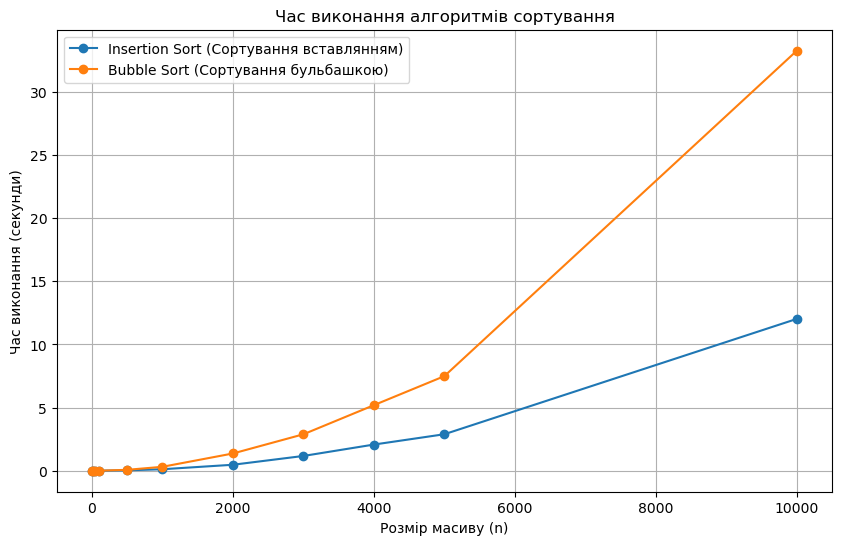

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr.copy())  # Копіюємо масив, щоб не змінювати оригінал
    end_time = time.time()
    return end_time - start_time

n_values = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000]
t_insertion = []
t_bubble = []

for n in n_values:
    test_array = np.random.randint(0, 10000, n)  # Генерація випадкового цілочисельного масиву
    t_insertion.append(measure_time(insertion_sort, test_array))
    t_bubble.append(measure_time(bubble_sort, test_array))

plt.figure(figsize=(10, 6))
plt.plot(n_values, t_insertion, label="Insertion Sort (Сортування вставлянням)", marker='o')
plt.plot(n_values, t_bubble, label="Bubble Sort (Сортування бульбашкою)", marker='o')
plt.xlabel("Розмір масиву (n)")
plt.ylabel("Час виконання (секунди)")
plt.title("Час виконання алгоритмів сортування")
plt.legend()
plt.grid(True)
plt.show()


## <center> Контрольні питання </center>

### 1. Що таке O-нотація і чим вона відрізняється від Ω -нотації?
О-нотація (Big-O) показує, як швидко зростає час роботи алгоритму в найгіршому випадку, тобто це його верхня межа. А ось Ω-нотація (Big-Omega) показує найкращий сценарій, тобто нижню межу. Ці нотації допомагають аналізувати, як ефективно працює алгоритм при збільшенні розміру вхідних даних

### 2. Яку часову складність має алгоритм сортування методом вставляння за найсприятливіших умов, коли масив відсортовано? Відповідь обґрунтувати.
У найкращому випадку, коли масив вже відсортований, алгоритм сортування вставлянням працює з часовою складністю O(n). Це тому, що кожен елемент порівнюється лише з попереднім, і жодних перестановок не потрібно.

### 3. Надати визначення ефективного алгоритму.
Ефективний алгоритм — це такий, який вирішує задачу за адекватний час і з мінімальним використанням ресурсів, як-от пам'ять і процесорна потужність. Він повинен забезпечувати достатню продуктивність, щоб бути придатним для практичного застосування.

### 4. Пояснити поняття головного параметра (розміру) завдання.
Основний параметр (розмір) задачі — це величина, яка визначає обсяг вхідних даних і впливає на складність роботи алгоритму. Наприклад, для алгоритмів сортування це кількість елементів у масиві, а для роботи з текстом — кількість символів у рядку.

### 5. Функція часової складності має вигляд: F(N) = N 3 + 7N 2 − 14N. Як записати асимптотичну складність у O-нотації?
Асимптотичну складність у O-нотації для функції $𝐹(𝑁) = 𝑁^3 + 7𝑁^2 − 14𝑁$ записують як $𝑂(𝑁^3)$. Це тому, що $𝑁^3$ є домінуючим членом у функції при великих 𝑁, а менш значущі члени відкидаються.